In [2]:
# Homework 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

In [2]:
# Problem 1
# Probability of rolling snake eyes: 1/36
# Probability of rolling 7s: 1/6
# Ratio of probabilities is 1 to 6.

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


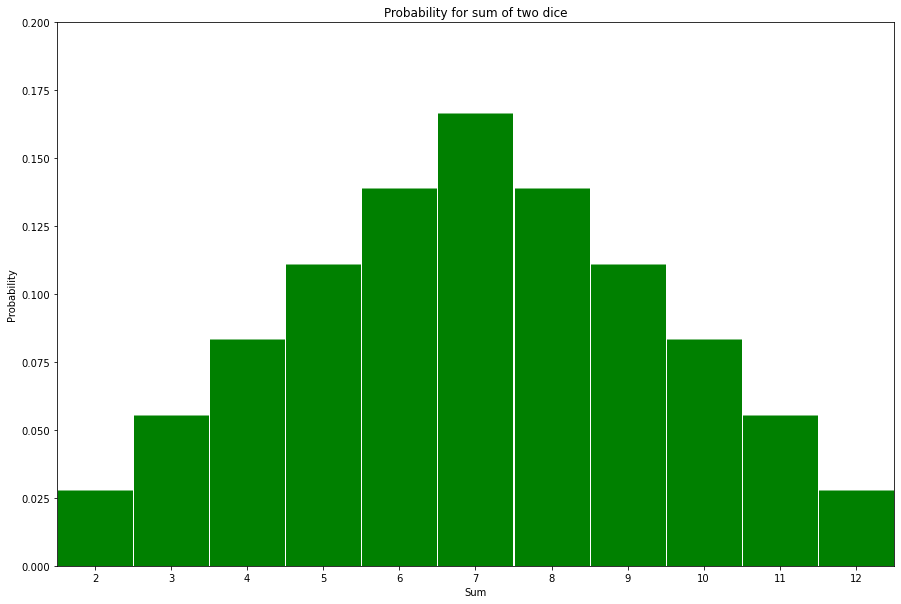

In [12]:
# Problem 2
# To analytically (math & counting) calculate the probabilities of the sums of two six-sided dice, first find the total number of possible
# outcomes, which in this case is 36 total outcomes for 2 six-sides dice. Then, find the number of outcomes that have the desired sum. 
# For example, if we want to analytically find the probability of getting a sum of 8, we count the number of outcomes where the sum of
# the die is 8. (die 1, die 2): (2,6), (6,2), (3,5), (5,3), (4,4) = 5 outcomes where the sum is 8. Therefore, the probability of getting 
# a sum of 8 is 5/36.

die = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]) # set probabilities of rolling each number on a six-sided die
probTwoDie = np.convolve(die, die)
print(probTwoDie) # print probablities for each sum

# plotting sum probablities
plt.title("Probability for sum of two dice")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.ylim(0, 0.2)
plt.xticks(range(2, 13))
plt.vlines(range(2, 13), 0, probTwoDie, linewidth = 75, color = 'g')
plt.show()

In [13]:
# Problem 3
x = np.array([2,3,4,5,6,7,8,9,10,11,12]) # Total distinct possible sums from two six-sided dice
mean = np.sum(x * probTwoDie)
variance = np.sum(x * x * probTwoDie) - (mean * mean)
print("mean: ", mean)
print("variance: ", variance)

mean:  6.999999999999998
variance:  5.833333333333357


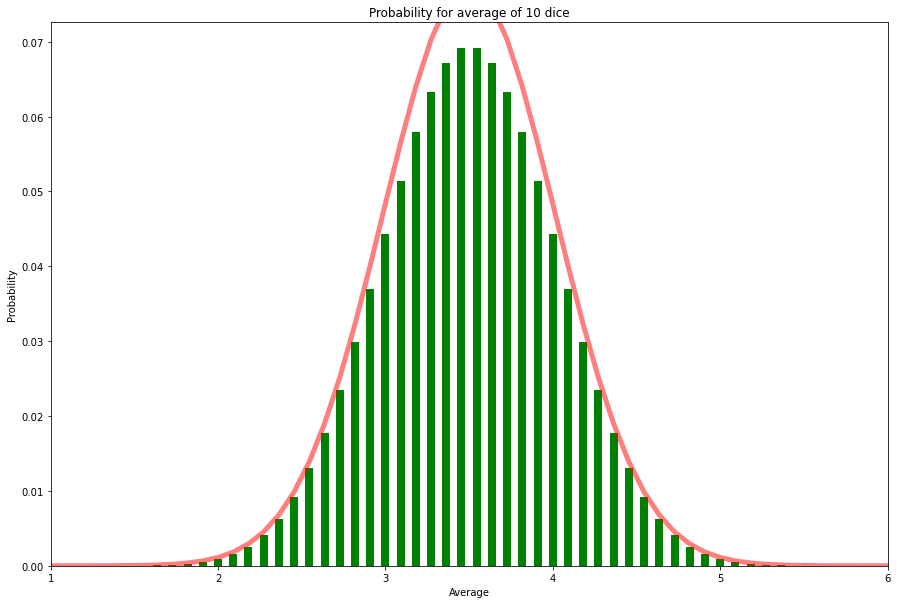

In [20]:
# Problem 4

# Calculating average of 10 dice
avgProbs = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
for i in range(10):
    avgProbs = np.convolve(die, avgProbs) # Doing convolve function 10 times
    
# Graphing distribution of 10 dice
plt.title("Probability for average of 10 dice")
plt.xlabel("Average")
plt.ylabel("Probability")
possibleAvgs = np.linspace(1, 6, len(avgProbs))
plt.vlines(possibleAvgs, 0, avgProbs, linewidth = 8, color = 'g');
plt.xlim(1, 6)
plt.ylim(0, None)

# Adding Gaussian distribution for comparison
mean = np.sum(possibleAvgs * avgProbs)
variance = np.sum((possibleAvgs - mean)**2 * avgProbs)
ax = plt.gca()
ax.plot(possibleAvgs, stats.norm.pdf(possibleAvgs, mean, np.sqrt(variance)) / 10, linewidth = 5, alpha =0.5, color = 'r')
plt.show()


In [21]:
# From the graph, it seems like the distribution is Gaussian, as the histrogram nicely follows the Gaussian distribution. According to the 
# Central Limit Theorem, as the sample size n grows larger, the distribution becomes closer and closer to a Gaussian distribution. In this case,
# we averaged 10 dice, but if we averaged 100 dice, the distribution would be even closer to a Gaussian. 

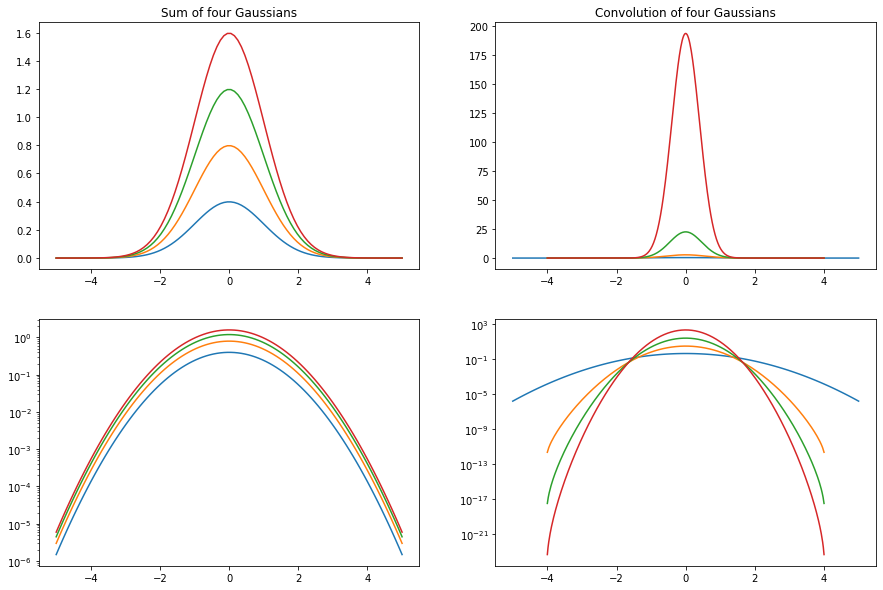

In [22]:
# Problem 5
dist = stats.norm()
x = np.linspace(-5, 5, 100)

ax_1 = plt.subplot(2, 2, 1) 
ax_1.set_title("Sum of four Gaussians")
ax_1.plot(x, dist.pdf(x))
ax_1.plot(x, dist.pdf(x) + dist.pdf(x))
ax_1.plot(x, dist.pdf(x) + dist.pdf(x) + dist.pdf(x))
ax_1.plot(x, dist.pdf(x) + dist.pdf(x) + dist.pdf(x) + dist.pdf(x))

ax_2 = plt.subplot(2, 2, 2)
ax_2.set_title("Convolution of four Gaussians")
ax_2.plot(x, dist.pdf(x))
avg = np.convolve(dist.pdf(x), dist.pdf(x))
avg_2 = np.convolve(avg, dist.pdf(x))
avg_3 = np.convolve(avg_2, dist.pdf(x))
ax_2.plot(np.linspace(-4, 4, len(avg)), avg)
ax_2.plot(np.linspace(-4, 4, len(avg_2)), avg_2)
ax_2.plot(np.linspace(-4, 4, len(avg_3)), avg_3)

ax_3 = plt.subplot(2, 2, 3)
ax_3.semilogy(x, dist.pdf(x))
ax_3.semilogy(x, dist.pdf(x) + dist.pdf(x))
ax_3.semilogy(x, dist.pdf(x) + dist.pdf(x) + dist.pdf(x))
ax_3.semilogy(x, dist.pdf(x) + dist.pdf(x) + dist.pdf(x) + dist.pdf(x))

ax_4 = plt.subplot(2, 2, 4)
ax_4.semilogy(x, dist.pdf(x))
ax_4.semilogy(np.linspace(-4, 4, len(avg)), avg)
ax_4.semilogy(np.linspace(-4, 4, len(avg_2)), avg_2);
ax_4.semilogy(np.linspace(-4, 4, len(avg_3)), avg_3);

In [ ]:
# From the graphs above, we can immediately tell that both the sum and average of Gaussian distributions are also Gaussian. We know this because
# the bottom two graphs are semilog on the y-axis, and both graphs show upside-down parabolas, which means the distribution must be Gaussian.
# The semilog graph of the averages of the Gaussian distribution is particularly interesting because it shows a decreasing standard deviation
# as the number of "convolve" functions is increased. This is an important result because it means that if we average consecutive independent 
# measurements, we can effectively eliminate standard deviation.